In [8]:
import requests
from bs4 import BeautifulSoup
from pprint import pprint

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib

In [3]:
url = "http://books.toscrape.com/"

In [6]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [13]:
books_html = soup.find_all("article")
books_html[0]

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

## Parsing _one_ book


In [42]:
book_title = books_html[0].find("h3").find("a").attrs['title']

In [46]:
book_price = float(books_html[0].find(class_='price_color').string.lstrip('£'))
book_price

51.77

In [47]:
book_stars_html = books_html[0].find("p", class_="star-rating")
book_stars_html

<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

In [49]:
book_stars_html.attrs['class']

['star-rating', 'Three']

In [50]:
def parse_rating(rating_classes):
    if "One" in rating_classes:
        return 1
    if "Two" in rating_classes:
        return 2
    if "Three" in rating_classes:
        return 3
    if "Four" in rating_classes:
        return 4
    if "Five" in rating_classes:
        return 5
    return 0

In [52]:
book_rating = parse_rating(books_html[0].find("p", class_="star-rating").attrs['class'])
book_rating

3

## Parsing _all_ books

In [55]:
books_dict = { 'Title': [], 'Price': [], 'Rating': [] }
for book in books_html:
    books_dict['Title'].append(book.find("h3").find("a").attrs['title'])
    books_dict['Price'].append(float(book.find(class_='price_color').string.lstrip('£')))
    books_dict['Rating'].append(parse_rating(book.find("p", class_="star-rating").attrs['class']))
pprint(books_dict)

{'Price': [51.77,
           53.74,
           50.1,
           47.82,
           54.23,
           22.65,
           33.34,
           17.93,
           22.6,
           52.15,
           13.99,
           20.66,
           17.46,
           52.29,
           35.02,
           57.25,
           23.88,
           37.59,
           51.33,
           45.17],
 'Rating': [3, 1, 1, 4, 5, 1, 4, 3, 4, 1, 2, 4, 5, 5, 5, 3, 1, 1, 2, 2],
 'Title': ['A Light in the Attic',
           'Tipping the Velvet',
           'Soumission',
           'Sharp Objects',
           'Sapiens: A Brief History of Humankind',
           'The Requiem Red',
           'The Dirty Little Secrets of Getting Your Dream Job',
           'The Coming Woman: A Novel Based on the Life of the Infamous '
           'Feminist, Victoria Woodhull',
           'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold '
           'at the 1936 Berlin Olympics',
           'The Black Maria',
           'Starving Hearts (Tr

In [56]:
len(books_dict)         # You should have 3 key:value pairs
len(books_dict["Title"])

20

## Loading data in Pandas

In [57]:
books_df = pd.DataFrame.from_dict(books_dict)
books_df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4
7,The Coming Woman: A Novel Based on the Life of...,17.93,3
8,The Boys in the Boat: Nine Americans and Their...,22.60,4
9,The Black Maria,52.15,1


<AxesSubplot:xlabel='Rating'>

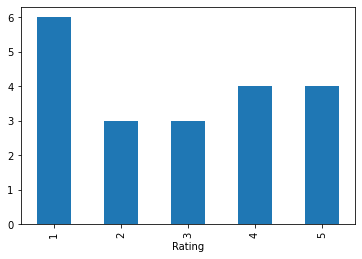

In [58]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar")

In [59]:
from nbresult import ChallengeResult

result = ChallengeResult('books',
    books_dict=books_dict,
    columns=books_df.columns,
    title=str(books_df.loc[0,'Title']),
    price=books_df.loc[0,'Price'],
    rating=books_df.loc[0,'Rating']
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/humbert/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/humbert/code/HumbertMonnot/data-challenges/02-Data-Toolkit/02-Data-Sourcing/02-Scraping
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 6 items

tests/test_books.py::TestBooks::test_books_df_columns_name PASSED        [ 16%]
tests/test_books.py::TestBooks::test_books_df_columns_size PASSED        [ 33%]
tests/test_books.py::TestBooks::test_books_dict_id_defined PASSED        [ 50%]
tests/test_books.py::TestBooks::test_first_book_price PASSED             [ 66%]
tests/test_books.py::TestBooks::test_first_book_rating PASSED            [ 83%]
tests/test_books.py::TestBooks::test_first_book_title PASSED             [100%]

============================== 6 passed in 0.37s ===============================


💯 You can commit your code:

git a

## Going through all the pages of the catalogue

In [61]:
MAX_PAGE = 3
all_books_dict = { 'Title': [], 'Price': [], 'Rating': [] }
for page in range(1, MAX_PAGE + 1):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    for book in books_html:
        all_books_dict['Title'].append(book.find("h3").find("a").attrs['title'])
        all_books_dict['Price'].append(float(book.find(class_='price_color').string.lstrip('£')))
        all_books_dict['Rating'].append(parse_rating(book.find("p", class_="star-rating").attrs['class']))

In [62]:
len(all_books_dict["Title"])

60

In [63]:
all_books_df = pd.DataFrame.from_dict(all_books_dict)
all_books_df.tail()

,Title,Price,Rating
55,Our Band Could Be Your Life: Scenes from the A...,57.25,3
56,Olio,23.88,1
57,Mesaerion: The Best Science Fiction Stories 18...,37.59,1
58,Libertarianism for Beginners,51.33,2
59,It's Only the Himalayas,45.17,2


<AxesSubplot:>

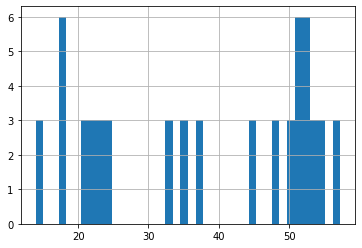

In [67]:
all_books_df["Price"].hist(bins = 40)

<AxesSubplot:xlabel='Rating'>

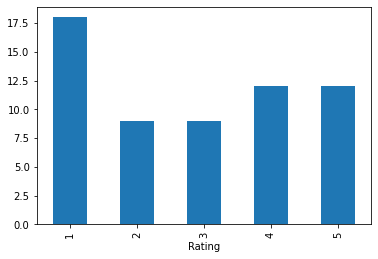

In [68]:
all_books_df.groupby("Rating").count()["Title"].plot(kind="bar")

In [69]:
all_books_df.to_csv("books.csv")

In [70]:
!pip install XlsxWriter

     |████████████████████████████████| 149 kB 2.3 MB/s            


In [71]:
all_books_df.to_excel('books.xlsx', sheet_name='Books')